In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [2]:
df_opsd_germany = pd.read_csv('opsd_germany_daily.csv')
df_opsd_germany.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [3]:
df_opsd_germany['Year'] = df_opsd_germany['Date'].apply(lambda x: x.split('-')[0])
df_opsd_germany.head()

,Date,Consumption,Wind,Solar,Wind+Solar,Year
0,2006-01-01,1069.184,NaN,NaN,NaN,2006
1,2006-01-02,1380.521,NaN,NaN,NaN,2006
2,2006-01-03,1442.533,NaN,NaN,NaN,2006
3,2006-01-04,1457.217,NaN,NaN,NaN,2006
4,2006-01-05,1477.131,NaN,NaN,NaN,2006


In [4]:
df_opsd_germany['Month'] = df_opsd_germany['Date'].apply(lambda x: x.split('-')[1])
df_opsd_germany.head()

,Date,Consumption,Wind,Solar,Wind+Solar,Year,Month
0,2006-01-01,1069.184,NaN,NaN,NaN,2006,01
1,2006-01-02,1380.521,NaN,NaN,NaN,2006,01
2,2006-01-03,1442.533,NaN,NaN,NaN,2006,01
3,2006-01-04,1457.217,NaN,NaN,NaN,2006,01
4,2006-01-05,1477.131,NaN,NaN,NaN,2006,01


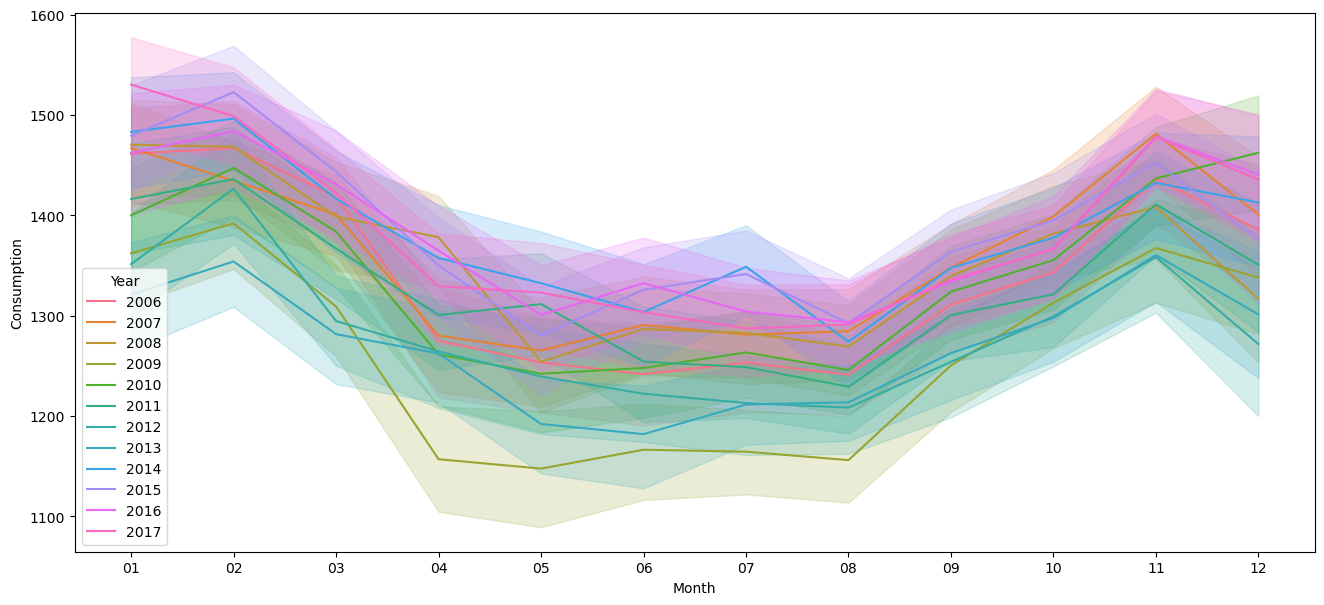

In [6]:
plt.figure(figsize=(16,7))
sns.lineplot(
    data = df_opsd_germany,
    x = "Month",
    y = "Consumption",
    hue = "Year"
)
plt.show()

In [12]:
X = df_opsd_germany[['Month', 'Year']].copy()
y = df_opsd_germany['Consumption'].copy()

print(y)

X_train = X[0:3653]
X_test = X[3654:]

y_train = y[0:3653]
y_test = y[3654:]

0       1069.18400
1       1380.52100
2       1442.53300
3       1457.21700
4       1477.13100
           ...    
4378    1263.94091
4379    1299.86398
4380    1295.08753
4381    1215.44897
4382    1107.11488
Name: Consumption, Length: 4383, dtype: float64


In [9]:
LR_Model_Benchmark = LinearRegression().fit(X_train,y_train)

In [10]:
print(LR_Model_Benchmark.score(X_train, y_train))

0.005140824349536999


In [14]:
y_pred_benchmark = LR_Model_Benchmark.predict(X_test)

In [21]:
MSE_LR_Benchmark = mean_squared_error(
    y_true = y_test,
    y_pred = y_pred_benchmark
)

print("Mean Squared Error:",MSE_LR_Benchmark)

Mean Squared Error: 28104.54892854318


In [22]:
MAPE_LR_Benchmark = mean_absolute_percentage_error(
    y_true = y_test,
    y_pred = y_pred_benchmark
)

print("Mean Absolute Percentage Error:",MAPE_LR_Benchmark)

Mean Absolute Percentage Error: 0.10519147118808618


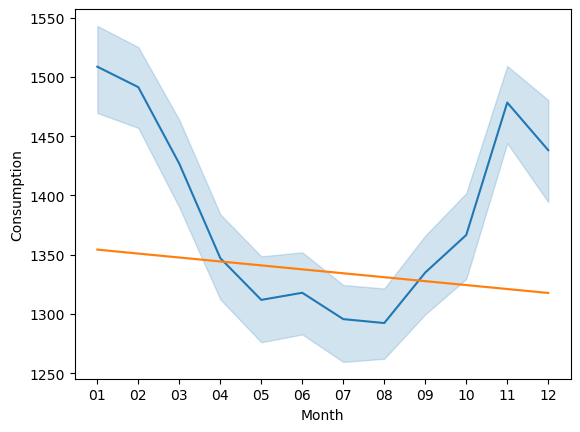

In [19]:
sns.lineplot(
    x = X_test['Month'],
    y = y_test
)
sns.lineplot(
    x = X_test['Month'],
    y = y_pred_benchmark
)
plt.show()